In [319]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Classification

Classification is the other very common type of supervised learning, along with regression. While regression predicts a raw value (a price, sales totals, number of customers, etc.), classification predicts a <i>class label</i> (spam/ham, fraud/not fraud, etc.). 

While classification can be used to predict many different classes, such as identify people's faces from an image, for now we will be only doing <i>binary classification</i> which splits data into two classes. This is generally phrased as a true/false question, where a value of 1 is true and 0 is false.

## Classification vs Regression

Classification and regression are largely similar in their setup, implementation, and use - the difference is the output. If our target value is a continuous numeric value, then the problem is a regression problem. If the target value is a class label, then the problem is a classification problem.

### Classification Dataset

We can do what Leo never could, predict who lives and who dies. We have a dataset of passengers on the Titanic, and we want to predict who survived and who didn't using the passenger data we have available. 

In [320]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Logistic Regression

Logistic regression is a classification model that is derived from a linear regression that we use to do regression. At a high level, we can think of logistic regression as a linear regression that predicts yes or no instead of a number - there's a little twist in the middle to make that happen, but that's the basic idea.

### Gradient Descent 

One of the critical distinctions that logistic regression raises for us is that unlike linear regression we can't determine a solution directly. In linear regression we can use the linear-least squares algorithm to calculate the model, or specifically, the coefficients (m and b) that we need to construct the model. In logistic regression there isn't an algorithm that is equivalent to linear-least squares that will generate an optimal solution directly. So, what do we do...

Since there's no way to generate an answer directly, we need a different approach, and that approach is basically a special version of guess and test called gradient descent. Gradient descent is an iterative algorithm that finds the optimal model (i.e. the slopes and intercept) by using a process of:
<ol>
<li> Make a guess for each weight (m and b) </li>
<li> Calculate the error of the model with the current weights </li>
<li> Adjust the weights to minimize the error </li>
<li> Go to step 2 until the error is no longer decreased </li>
</ol>

### Gradient Descent Details

<b>Note:</b> the mechanics of gradient descent require a bit of calculus and linear algebra to fully understand, and we don't need to fully be able to work through the entire process with the math to use it in practice. The idea of the process listed above is a good baseline of understanding, knowing the details more fully is helpful - particularly if you're going to be doing more advanced work with machine learning. For now, if the full details don't make sense, don't dwell on it for now. 

#### How is it Regression?

The name "logistic regression" is a bit of a misnomer, as it's actually a classification model. The reason it's called regression is because the model is based on a linear regression model. Inside of a logistic regression model there is a linear regression that predicts a value called the logit - or the log-odds. The log-odds are a way of representing the probability of a class label being true or false.

$ logit = m_1x_1 + m_2x_2 + ... + m_nx_n + b = \sum_{i=1}^{n} m_ix_i + b $

The logit is then transformed into a probability using the logistic function (also called the sigmoid function). The sigmoid function is an S-shaped curve that maps the log-odds to a probability, defined as:

$ \sigma(t) = \frac{1}{1 + e^{-t}} $

Where t is the logit. The logistic function maps the logit to a value between 0 and 1, which can be interpreted as a probability.

#### How Does it Work?

The gradient descent process finds the slope and intercept of the linear regression model that is inside of that sigmoid equation above. In this case, the slope and intercept can't be calculated directly, so we use gradient descent to find the optimal values. The process starts by making some random guess for the slopes and intercept, then seeing how good that model is. This guess could be anything, it doesn't need to be accurate for things to work, though if it is way off then it may take longer to converge - or find an answer. 

#### The Cost Function

The error of the model is calculated using something called a cost function. The cost function is just a function that measures error in our predictions, for regression problems, this is usually the mean squared error. For logistic regression, we normally use a cost function called the log loss. 

The log loss measures error in a way that depends on the True/False, or 1/0 value of the target. The log loss measures the distance between the probability of the class label being true and the actual class label. The log loss is defined as:

$ L(y, p) = -\frac{1}{n} \sum_{i=1}^{n} y_i \log(p_i) + (1 - y_i) \log(1 - p_i) $

Where:
- $ y_i $ is the actual class label
- $ p_i $ is the predicted probability of the class label being
- $ n $ is the number of samples
- $ \log $ is the natural logarithm
- $ \sum $ is the sum of all the samples

In more human language, this means that we have a real value in the data that is either:
<ul>
<li> 1 if the class label is true </li>
<li> 0 if the class label is false </li>
</ul>

And we get a prediction that is <i>the probability that the class label is true (1)</i>. The residual, or error, for one prediction is just how far that probability prediction is from the correct value, be it 0 or 1. 

Note that these costs are not the actual accuracy of the model. Predictions over .5 are later translated into True predictions, and those under .5 are translated into False predictions. After the model is created, we'd look at these predictions and add up their accuracy to see how well the model is doing overall. The cost calculation is internal to the model and is used to adjust the weights and biases to minimize the error through each iteration of training. 

#### Odds and Log Odds

To understand the idea of the logit, we need to understand our problem in terms of probability. In a logistic regression, we are predicting the probability of a class label being true, or 1. We can also phrase probabilities as odds, which is just the probability of an event happening divided by the probability of the event not happening. So if we have a logistic regression predicting the probability of a class label being 1 is .66, then that 66% probability is the same as 2:1 odds. A 50% probability is the same as 1:1 odds, and an 80% probability is the same as 4:1 odds.

The logit, or the value that our linear regression predicts, is the natural log of this odds value. The natural log is used because it's a nice function to work with mathematically, and it's a smooth function that is easy to work with in the gradient descent process. 

#### Adjusting the Weights

The one step that seems somewhat magical in gradient descent is the step to adjust the weights to make the model better. After the error of the model is calculated, this step figures out two things, using some calculus that we don't need to understand in detail:
<ol>
<li> How much of the error is each term (m1*x1, m2*x2, etc.) responsible for </li>
    <ul>
    <li> This, in turn, tells us how much to adjust each weight </li>
    </ul>
<li> The direction to adjust the weights - larger or smaller </li>
</ol>

So, if we do one iteration of the gradient descent process, and the error is "7", the first step above uses calculus to tell us that m1*x1 is responsible for 3 of that error, and m2*x2 is responsible for 2 of that error, etc... Then, the second step tells us that we need to increase m1*x1 and m2*x2, and decrease m3*x3, etc... The weights of each term are adjusted as prescribed, and in the next check of the total error, the error should be less than 7. The responsibility is then divied amongst each term, and the process repeats until the error is at a point where we aren't improving or we've hit a limit. 

#### The Learning Rate

The learning rate is a hyperparameter that controls how much the weights are adjusted at each step. If the learning rate is too high, the weights will bounce around and the model will never converge. If the learning rate is too low, the model will take a long time to converge. The learning rate is a critical hyperparameter that needs to be tuned to get the model to converge.

This matters more in larger and more complex models, the learning rate can be critical in ensuring that things actually find a solution, and that we don't get "stuck" in a suboptimal solution.

#### The Sigmoid Function

The sigmoid function is a critical part of the logistic regression model. The sigmoid function is what maps the logit to a probability. The sigmoid function is defined as:

$ \sigma(t) = \frac{1}{1 + e^{-t}} $

Where t is the logit. The sigmoid function maps the logit to a value between 0 and 1, which can be interpreted as a probability.

So we do a linear regression to get the logit, then we use the sigmoid function to map that logit to a probability, then that probability is used to calculate the error, and the error is used to adjust the weights. The key feature of the sigmoid is that it translates any input (logit) into a value between 0 and 1, which is perfect for a probability. It's also a smooth function, which is important for the gradient descent process' math to work efficiently - this can be a calculation-heavy process, and the sigmoid function is a good choice for this.

### Summary

So, the gradient descent process in logistic regression isn't too complex, but it is more involved than the simple linear regression. In short, the process is:
<ul>
<li> Make a guess for each weight (m and b) </li>
<li> Do a linear regression to get the logit (log of the odds) </li>
<li> Use the sigmoid function to map the logit to a probability </li>
<li> Calculate the error of the model using the log loss (distance from probability to real 1/0) </li>
<li> Adjust the weights to minimize the error </li>
<li> Go to step 2 until the error is no longer decreased </li>
</ul>

The math inside is a nice-to-know, but not required to use and understand the model to a reasonable level. 

### What Do I Actually Need to Know?

The details of the mathematics involved in gradient descent aren't needed for us to use it. However, there are a few things that are important to understand:
<ul>
<li> The process of gradient descent - iterations, error, adjustments, etc... </li>
<li> The cost function - both the idea of the cost function, and log-loss in particular. </li>
</ul>

### Logistic Regression Process

Using logistic regression is very similar to using linear regression, or any other model in the sklearn package. 

One key difference is the target, we need it to be a binary value here, represented as 0 or 1. So the problem will be framed as "this is true" or "this is false", where the "this" is whatever we're predicting - in this case, whether or not a passenger survived.

<b>Note:</b> We will look at hyperparameters for logistic regression later, when we look at accuracy metrics and model tuning. For now, check the sklearn docs and try to see if you can adjust a couple for different trials. 

### Example - Two Input Classification

We can do a very simple example, we will use age as the sole input to predict whether or not a passenger survived.

In [321]:
df_small = df[['age',"pclass", 'survived']]
df_small = df_small.dropna()
df_small.head()

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


<Axes: xlabel='age', ylabel='pclass'>

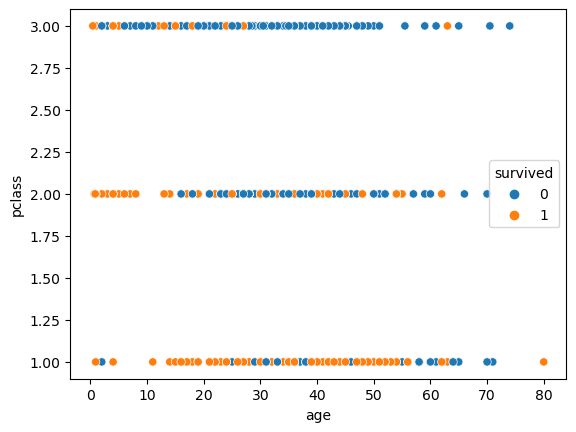

In [322]:
sns.scatterplot(x='age', y='pclass', data=df_small, hue='survived')

In [323]:
X_small = df_small[['age',"pclass"]]
y_small = df_small['survived']

X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(X_small, y_small)

small_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression())
])

small_pipeline.fit(X_small_train, y_small_train)

print("Training Score: ", small_pipeline.score(X_small_train, y_small_train))
print("Testing Score: ", small_pipeline.score(X_small_test, y_small_test))

Training Score:  0.708411214953271
Testing Score:  0.7150837988826816


We can also grab some of the details of the prediction to look more closely. 

In [324]:
from sklearn.metrics import log_loss

# Get the predicted probabilities
y_small_pred = small_pipeline.predict_proba(X_small_test)[:, 1]

# Calculate the residuals
residuals = y_small_test - y_small_pred

# Calculate the log loss
log_loss_value = log_loss(y_small_test, y_small_pred)

# Create a dataframe with residuals, true target values, and log loss
print("Log Loss: ", log_loss_value)
df_res = pd.DataFrame({'Prediction':y_small_pred, 'True Target': y_small_test, 'Residual': residuals})

df_res.sample(10)


Log Loss:  0.5794147803873162


,Prediction,True Target,Residual
621,0.625488,1,0.374512
572,0.663748,1,0.336252
767,0.219603,0,-0.219603
150,0.312510,0,-0.312510
676,0.249581,0,-0.249581
597,0.143894,0,-0.143894
474,0.262850,0,-0.262850
81,0.226848,1,0.773152
326,0.107399,0,-0.107399
160,0.161917,0,-0.161917


### Classification Results

Classification has different metrics to evaluate its performance than regression. In a regression, the error is pretty simple - we have a model that predicts a value, and its accuracy is just some aggregation of how far those prediction are from the real values. 

#### Accuracy

The most basic metric for classification is accuracy, which is the percentage of predictions that are correct. The score function returns the accuracy of classification models by default. 

#### Error Types

In a binary classification problem we can have a prediction be correct or incorrect, but it can be correct or incorrect in two different ways. If a real value is True, we can predict it to be True (a true positive) or False (a false negative). If a real value is False, we can predict it to be False (a true negative) or True (a false positive). So there are four different categories of predictions that we can end up with. 

#### Confusion Matrix

A tool that we often use to understand the performance of a classification model is a confusion matrix. A confusion matrix is a two by two grid of "Predicted Values" vs "Actual Values", with a count (or a percentage) of predictions that fall into that bucket. 

One key thing is that we can learn from the confusion matrix is if there is a substantial skew in the predictions towards false negatives or false positives. This can be an indication the model has some kind of issue we need to address. The next notebook looks more closely at error metrics and evaluating the quality of classification models. 

<b>Note:</b> the output of the confusion matrix can be fed into a sns heatmap directly, and it will make a nice pretty one for you. 

In [325]:
conf_mat_small = confusion_matrix(y_small_test, small_pipeline.predict(X_small_test))
conf_mat_small

array([[89, 15],
       [36, 39]])

<Axes: >

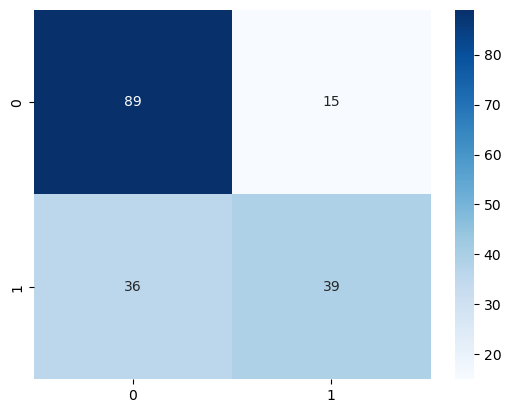

In [326]:
sns.heatmap(conf_mat_small, annot=True, fmt='d', cmap='Blues')

### Example - Using More Features

We can also use more features to predict survival, as we normally would in most cases. The process here will largely mirror the regression process, though we have a few small differences in the target and how we evaluate the results. This data has mixed features, both continuous and categorical, so we will need to do some preprocessing with column transformers and pipelines to get it ready for the model.

We will also do a little exploration in the setup, for practice. 

##### Explore Data Initially

We can look first at the data at a high level, largely to determine if we need to do any "big" changes to the data. 

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [328]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the deck varaible has a lot of missing values, we can drop it. We can also drop the ticket number, as it's not likely to be useful.

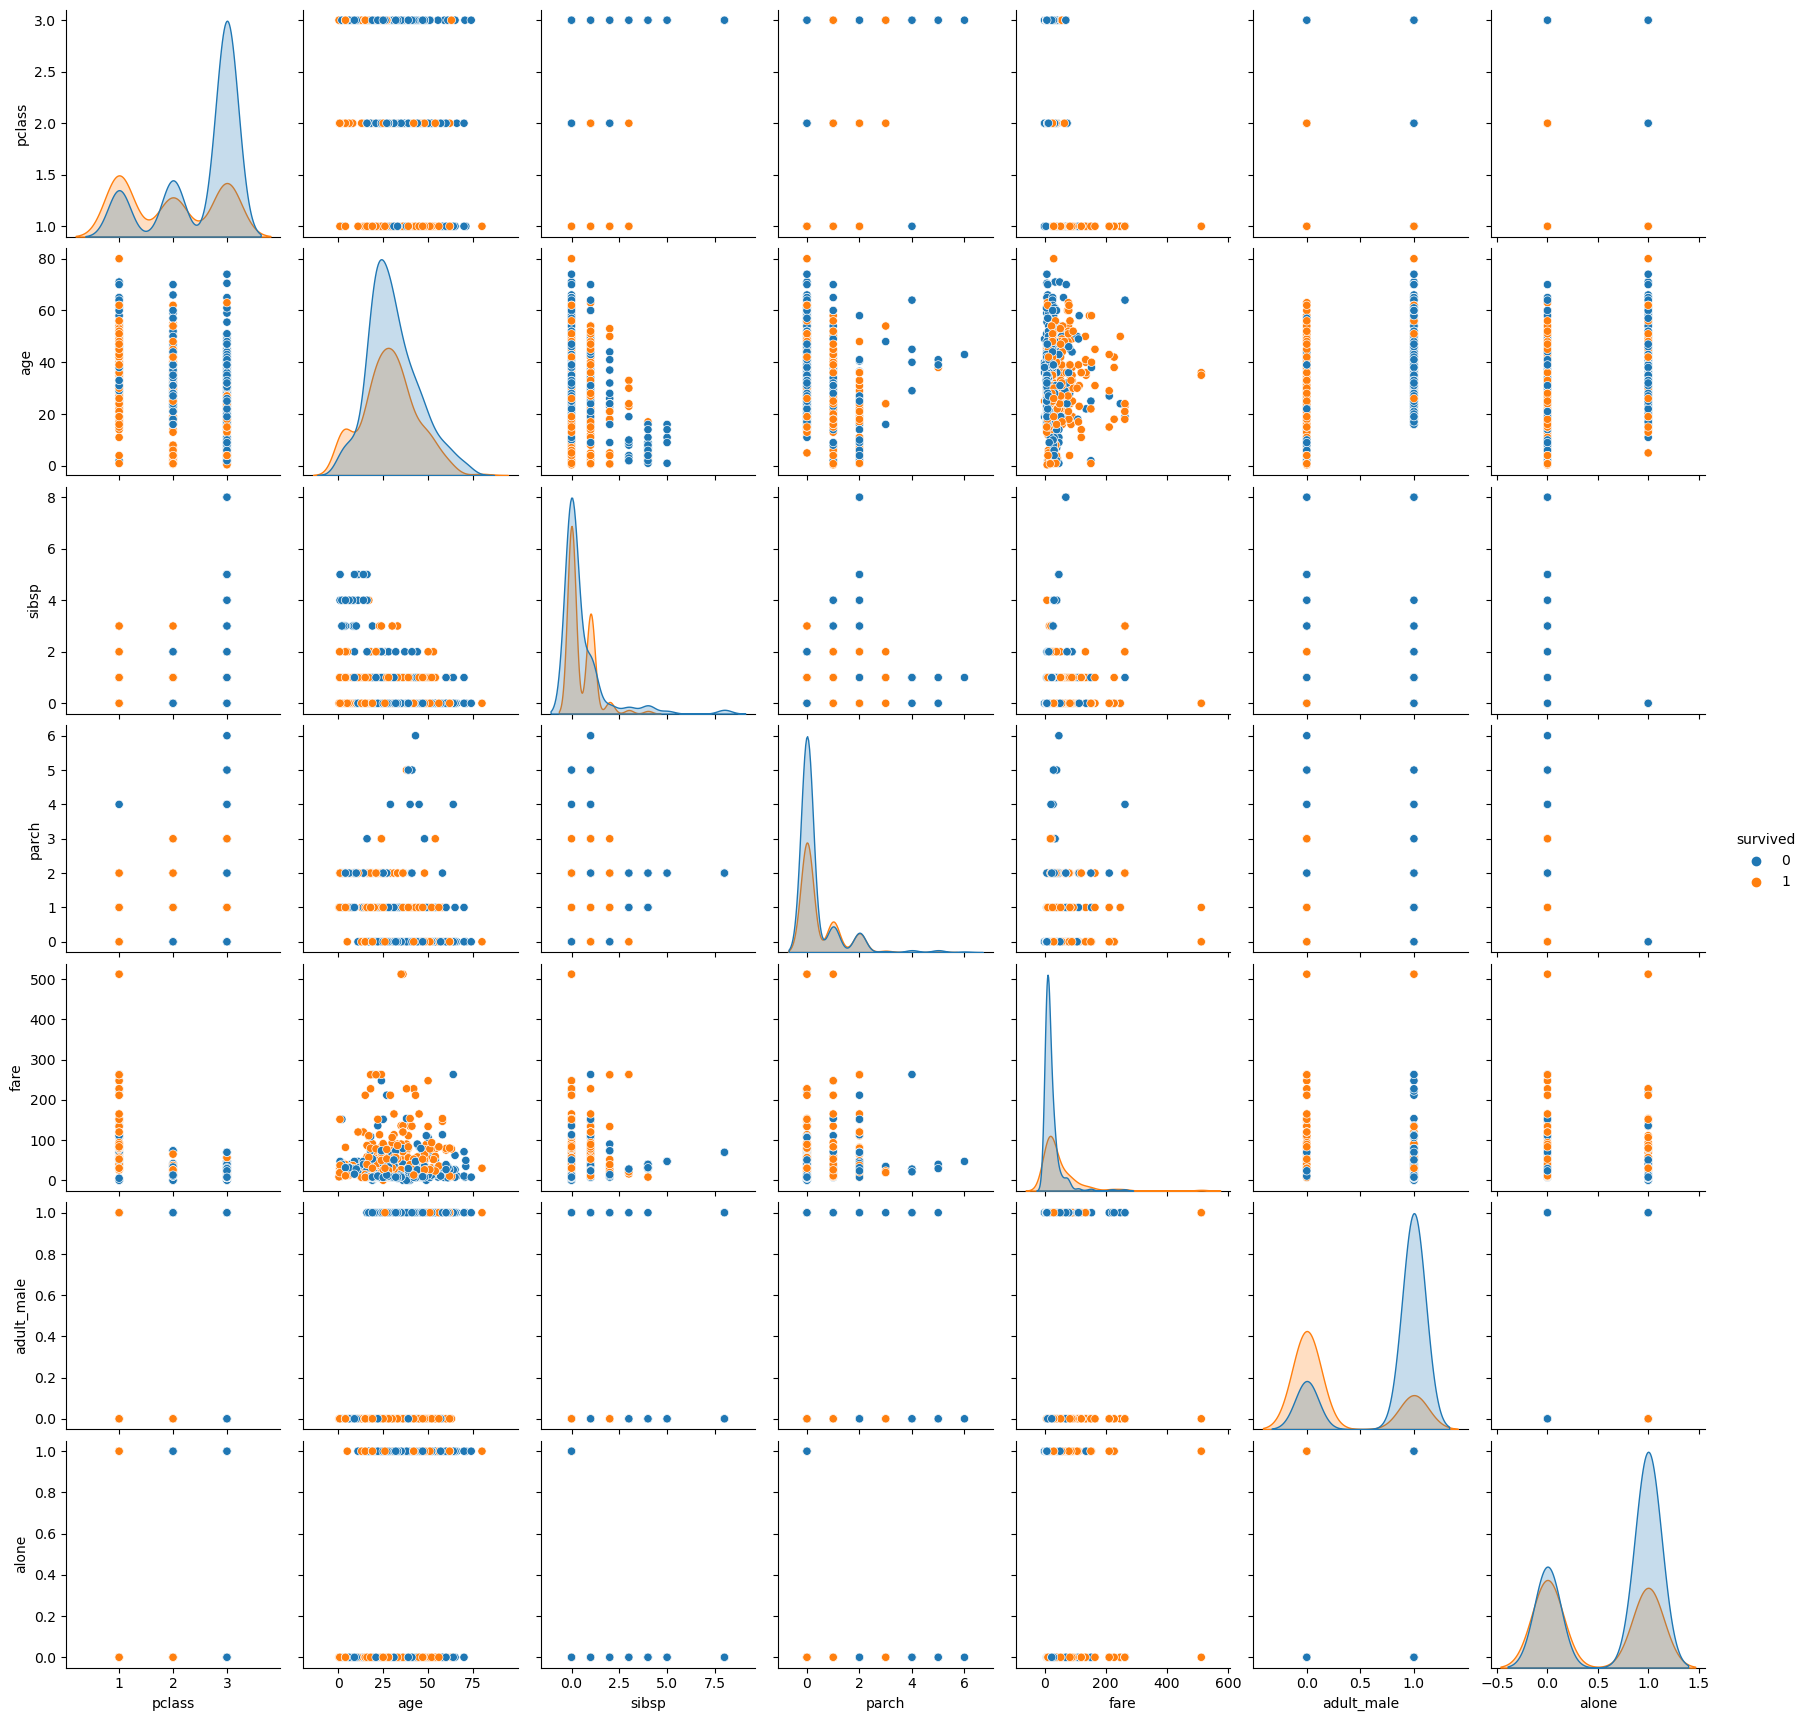

In [329]:
sns.pairplot(df, hue='survived')

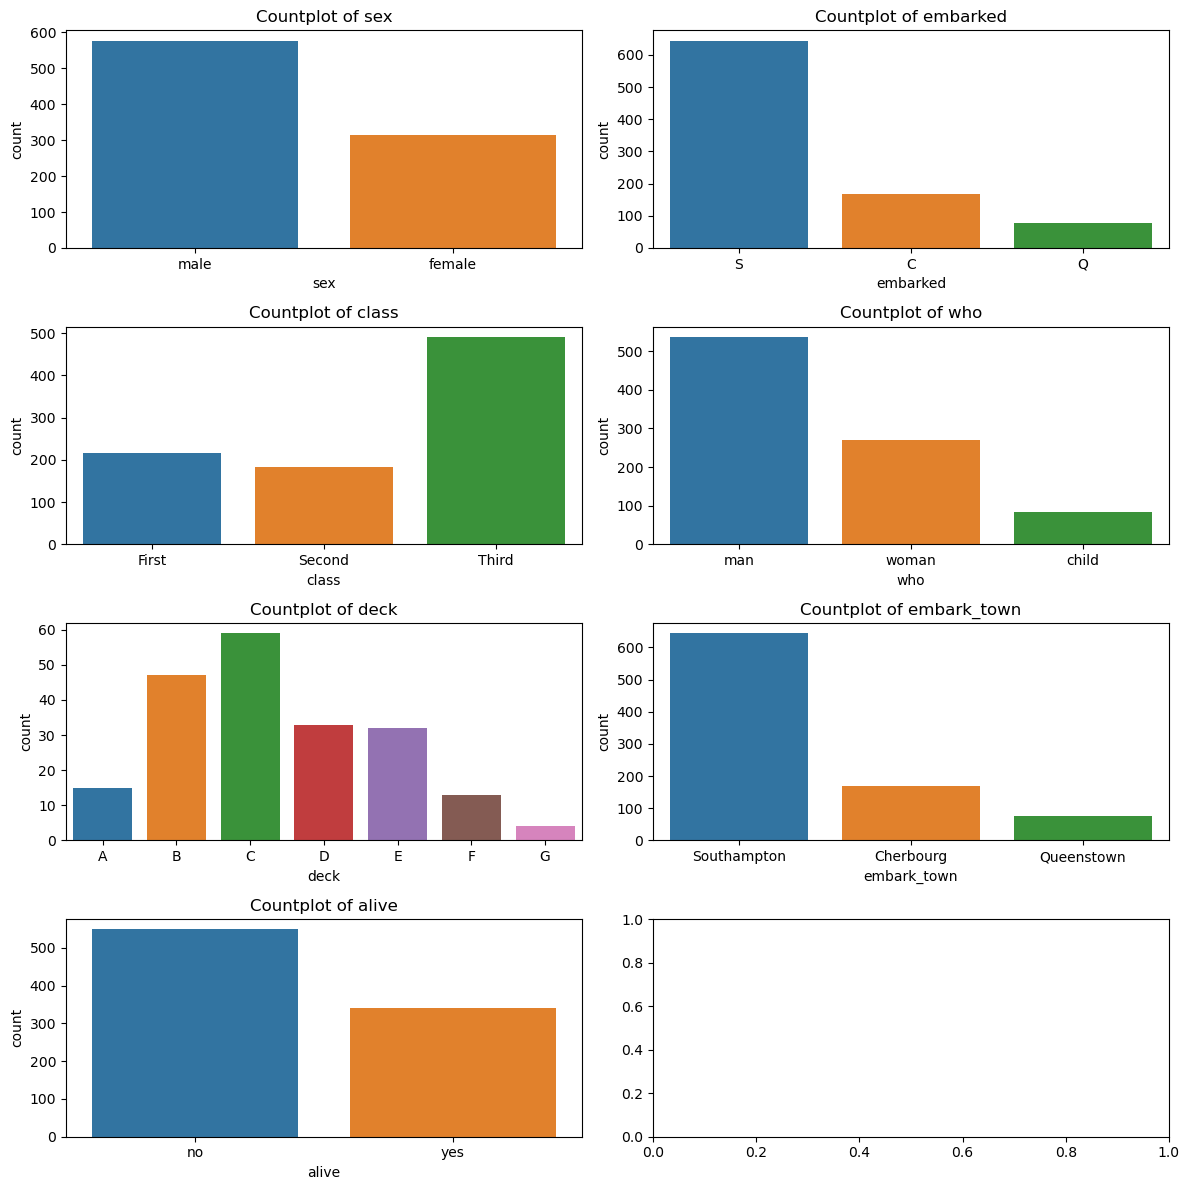

In [330]:
import matplotlib.pyplot as plt

# Get the categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create a grid of subplots
fig, axs = plt.subplots((len(categorical_cols)+1)//2, 2, figsize=(12, 3*((len(categorical_cols)+1)//2)))

# Create a countplot for each categorical variable
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Countplot of {col}')

# Display the plots
plt.tight_layout()
plt.show()

##### Perform Filtering and Preprocessing

We can now filter out data that may be an issue. I'm going to get rid of outliers, as well as a few columns that look like they may be redundant (you can try to keep them if you want, and see what the results are). 

In [331]:
df_post = df.drop(columns=['adult_male','deck','embark_town','alive','alone',"who"])
df_post = df_post[df_post["fare"] < 300]
df_post = df_post[df_post["sibsp"] < 5.5]


df_post.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third


##### Model and Evaluate

Training Score:  0.8121212121212121
Testing Score:  0.7647058823529411
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       132
           1       0.74      0.64      0.69        89

    accuracy                           0.76       221
   macro avg       0.76      0.74      0.75       221
weighted avg       0.76      0.76      0.76       221



<Axes: >

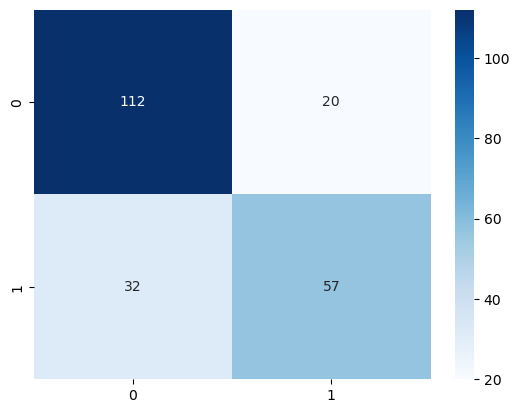

In [332]:
y = df_post['survived']
X = df_post.drop(columns='survived')

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a preprocessor for numeric columns
numeric_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Create a preprocessor for categorical columns
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_preprocessor, ['age', "sibsp", "parch", "fare"]),
    ('cat', categorical_preprocessor, ["pclass", "sex", "embarked", "class"])
])

# Create a pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# Fit the pipeline
final_pipeline.fit(X_train, y_train)

# Print the training and testing scores
print("Training Score: ", final_pipeline.score(X_train, y_train))
print("Testing Score: ", final_pipeline.score(X_test, y_test))

print(classification_report(y_test, final_pipeline.predict(X_test)))

#Show confusion matrix
conf_mat = confusion_matrix(y_test, final_pipeline.predict(X_test))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

## Exercise

Predict the sex of the penguins below. 

<b>Note:</b> there may be some data prep steps that will cause things to fail if you miss them. The error will likely be descriptive. 

In [333]:
df_ex1 = sns.load_dataset('penguins')
df_ex1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [334]:
df_ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [335]:
df_ex1["target"] = df_ex1["sex"].map({"Male": 1, "Female": 0})
df_ex1.drop(columns=["sex"])
df_ex1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,target
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0


In [336]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]),
    ('cat', cat_pipe, ["species", "island"])
])

final_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression())
])

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90        45
         1.0       0.92      0.85      0.88        39

    accuracy                           0.89        84
   macro avg       0.90      0.89      0.89        84
weighted avg       0.89      0.89      0.89        84



<Axes: >

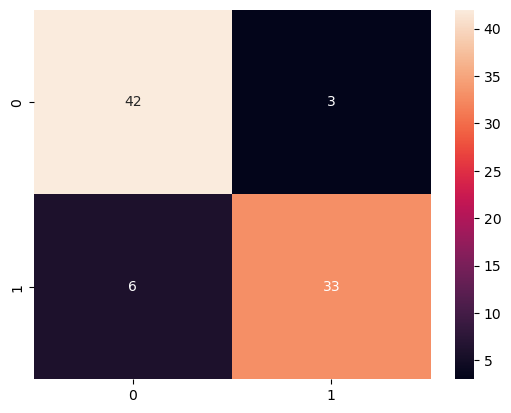

In [337]:
df_ex1 = df_ex1.dropna(subset=["target"])

X_peng = df_ex1.drop(columns=["target"])
y_peng = df_ex1["target"]

X_pen_train, X_pen_test, y_pen_train, y_pen_test = train_test_split(X_peng, y_peng)

final_pipe.fit(X_pen_train, y_pen_train)

print(classification_report(y_pen_test, final_pipe.predict(X_pen_test)))
sns.heatmap(confusion_matrix(y_pen_test, final_pipe.predict(X_pen_test)), annot=True, fmt='d')